# House price prediction model

In [1]:
import numpy as np 
import pandas as pd

In [2]:
housing=pd.read_csv("data.csv")

In [3]:
housing.head(2) 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.00
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.01


In [4]:
housing.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,NaN,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
housing.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,NaN,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [6]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.00
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.01
2,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.02
3,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.03
4,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.04


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
housing["CHAS"].value_counts()

CHAS
0    478
1     28
Name: count, dtype: int64

In [9]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.428744,14.856719,8.245968,0.055336,0.553238,6.417559,66.842490,3.849605,8.488142,397.219368,17.421542,364.350375,10.139822,23.383619
std,8.658799,20.628389,6.963600,0.228861,0.091196,0.628449,23.088092,1.807053,9.428042,168.884955,2.294848,87.984519,7.066314,8.258971
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,6.800000,1.129600,1.000000,187.000000,12.600000,0.320000,2.470000,5.000000
25%,0.006320,0.000000,2.310000,0.000000,0.504000,6.112000,58.875000,2.431300,1.000000,296.000000,15.300000,384.647500,4.980000,19.625000
50%,0.082325,18.000000,4.930000,0.000000,0.538000,6.575000,65.200000,4.090000,4.000000,296.000000,17.400000,396.235000,6.810000,24.116500
75%,3.647423,18.000000,18.100000,0.000000,0.597000,6.575000,86.800000,4.090000,24.000000,666.000000,20.200000,396.900000,13.997500,24.767500
max,88.976200,95.000000,27.740000,1.000000,0.770000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

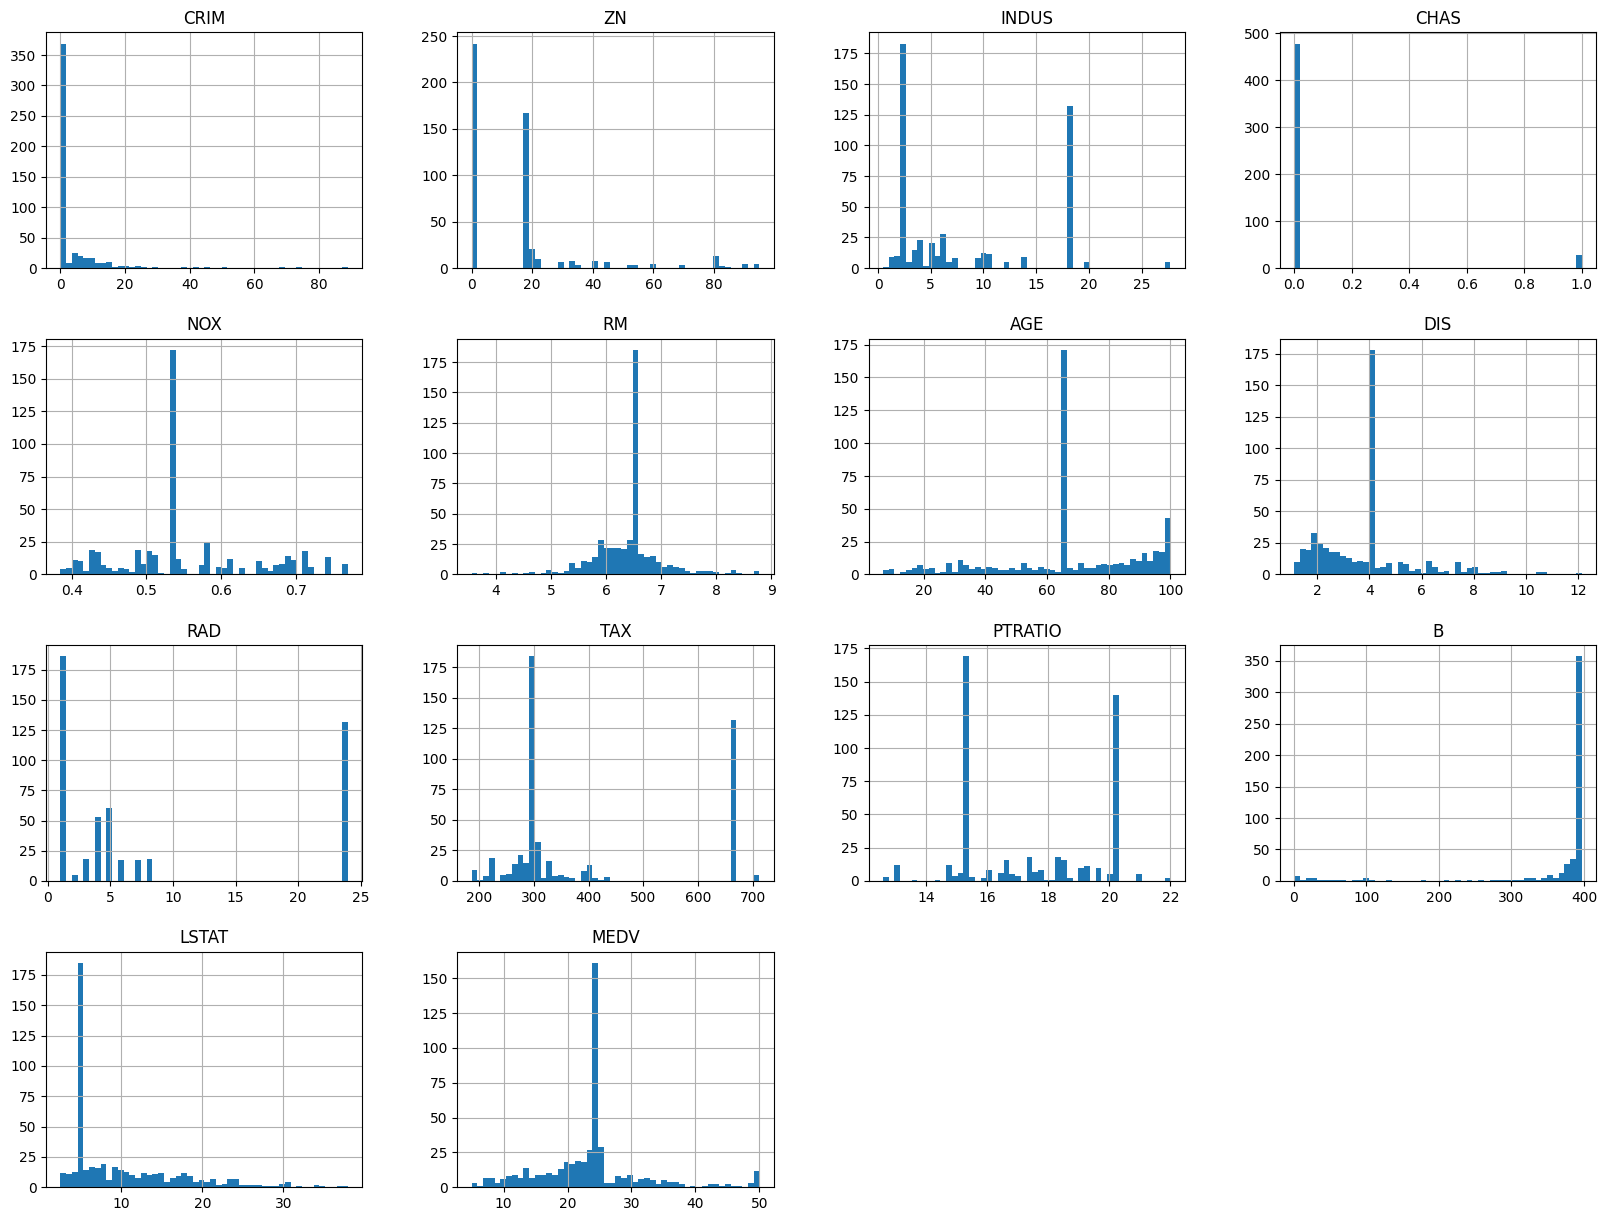

In [10]:
housing.hist(bins=50,figsize=(20,15))

In [11]:
import matplotlib.pyplot as plt

## Train-Test Splitting

In [12]:
# ##For learning purpose

def splitting_train_test(data,test_ratio):
    np.random.seed(42) #same random results every time you run your code
    shuffled=np.random.permutation(len(data))# Data is randomized before splitting it into train and test sets
    test_set_size=int(len(data)*test_ratio)#This calculates how many rows will go into the test set.
    test_indices=shuffled[:test_set_size]# Take the first part as the test set
    train_indices=shuffled[test_set_size:]# Take the rest as the training set
    return data.iloc[train_indices],data.iloc[test_indices] # Return both sets
    
    

In [13]:
train_set,test_set=splitting_train_test(housing,0.2)#This calls the split_train_test function (or splitting_train_test

In [14]:
95/6

15.833333333333334

In [15]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in both:-\nTraining data:{len(train_set)}\nTest data:{len(test_set)}")

Rows in both:-
Training data:404
Test data:102


In [16]:
#It helps in splitting datasets while maintaining the proportion of a specific category.
from sklearn.model_selection import StratifiedShuffleSplit 
splitz=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in splitz.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [17]:
 strat_train_set['CHAS'].value_counts()

CHAS
0    382
1     22
Name: count, dtype: int64

In [18]:
#382/22

In [19]:
 strat_test_set['CHAS'].value_counts()

CHAS
0    96
1     6
Name: count, dtype: int64

#97/6

In [20]:
housing=strat_train_set.copy()

## Looking correlations

- strongly negative- One grows while other shrink
- strongly positive- They grow together. 

In [21]:
corr_matrix=housing.corr()

In [22]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.673763
ZN         0.400868
B          0.396380
DIS        0.293959
CHAS       0.147114
AGE       -0.414464
CRIM      -0.469226
RAD       -0.495975
NOX       -0.514811
PTRATIO   -0.532172
INDUS     -0.562809
TAX       -0.598029
LSTAT     -0.695698
Name: MEDV, dtype: float64

In [23]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

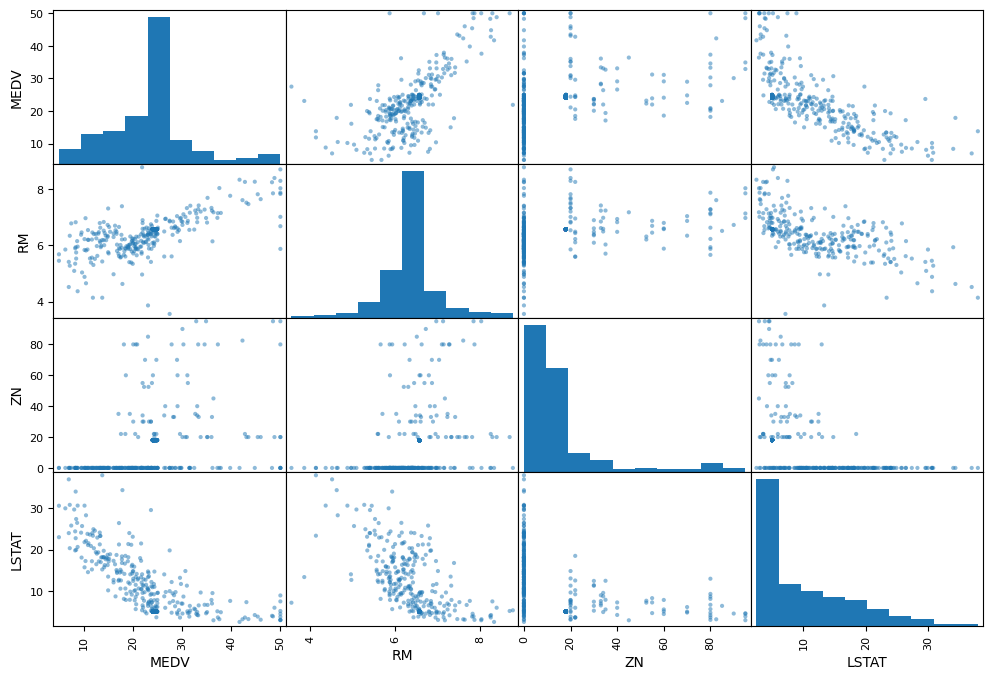

In [24]:
attributes=['MEDV','RM','ZN','LSTAT']
scatter_matrix(housing[attributes], figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

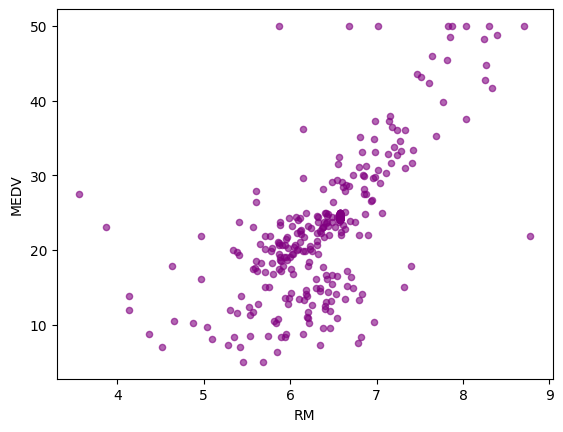

In [25]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.6,color="purple")

In [26]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

### Making New Attribute Combinations

In [27]:
housing['TAXRM']=housing['TAX']/housing['RM']

In [28]:
housing.tail()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
267,0.57834,20.0,3.97,0,0.575,8.297,67.0,2.4216,5,264,13.0,384.54,7.44,31.818730
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,107.022336
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13,112.386095
72,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,45.019011
232,0.57529,0.0,6.20,0,0.507,8.337,73.3,3.8384,8,307,17.4,385.91,2.47,36.823798


# How to tackle with missing values

- to get rid of missing data points.
- get rid of the whole atrribute.
- set the value to 0 mean or median.

In [30]:
a=housing.dropna(subset=['RM']).shape #option1

In [31]:
housing.drop("RM",axis=1) #it will not drop the coloumn of RM from orignal excel data

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
41,0.00632,18.0,2.31,0,0.538,65.2,4.0900,1,296,15.3,396.90,4.98,45.019011
239,0.09252,30.0,4.93,0,0.428,42.2,6.1899,6,300,16.6,383.78,7.37,45.413261
51,0.00632,18.0,2.31,0,0.538,65.2,4.0900,1,296,15.3,396.90,4.98,45.019011
96,0.00632,18.0,2.31,0,0.538,65.2,4.0900,1,296,15.3,396.90,4.98,45.019011
75,0.00632,18.0,2.31,0,0.538,65.2,4.0900,1,296,15.3,396.90,4.98,45.019011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,0.57834,20.0,3.97,0,0.575,67.0,2.4216,5,264,13.0,384.54,7.44,31.818730
379,17.86670,0.0,18.10,0,0.671,100.0,1.3861,24,666,20.2,393.74,21.78,107.022336
468,15.57570,0.0,18.10,0,0.580,71.0,2.9084,24,666,20.2,368.74,18.13,112.386095
72,0.00632,18.0,2.31,0,0.538,65.2,4.0900,1,296,15.3,396.90,4.98,45.019011


In [32]:
median_RM=housing["RM"].median()

In [33]:
housing["RM"].fillna(median_RM)

41     6.575
239    6.606
51     6.575
96     6.575
75     6.575
       ...  
267    8.297
379    6.223
468    5.926
72     6.575
232    8.337
Name: RM, Length: 404, dtype: float64

In [34]:
# SimpleImputer to fill missing values in your dataset.
from sklearn.impute import SimpleImputer

# Create the imputer and set it to use the median
imputer = SimpleImputer(strategy='median')

# Fit the imputer to the data (learn the medians)
imputer.fit(housing)

SimpleImputer(strategy='median')

In [35]:
imputer.statistics_

array([8.23250000e-02, 1.80000000e+01, 4.93000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.57500000e+00, 6.52000000e+01, 4.09000000e+00,
       4.00000000e+00, 2.96000000e+02, 1.74000000e+01, 3.95955000e+02,
       6.88500000e+00, 4.50190114e+01])

In [36]:
X=imputer.transform(housing) 

In [37]:
housing_tr = pd.DataFrame(X,columns=housing.columns)

In [38]:
housing_tr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,45.019011
1,0.09252,30.0,4.93,0.0,0.428,6.606,42.2,6.1899,6.0,300.0,16.6,383.78,7.37,45.413261
2,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,45.019011
3,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,45.019011
4,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,45.019011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.57834,20.0,3.97,0.0,0.575,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44,31.818730
400,17.86670,0.0,18.10,0.0,0.671,6.223,100.0,1.3861,24.0,666.0,20.2,393.74,21.78,107.022336
401,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13,112.386095
402,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,45.019011


## Scikit-learn Design

 primarily , three types of objects
 ## Estimators 
- It estimates some params based on a dataset.for eg imputer it has a "fit()" and    "transform()" methods.

     #### fit()
 - What it does: Learns from your data.
- When to use it: When you want to understand your data (like finding the  average/median).
     #### transform()
 - What it does: Changes your data based on what was learned.
 - When to use it: After you've learned, to apply those changes (like scaling the data).
     #### fit_transform()
 - What it does: Combines the two—learns from the data and changes it all in one go.
 - When to use it: When you want to do both steps at once.

## transformers 
 - This method takes inpu from fit() and then transform.It also has a concenience function called fit_transform() which fits and then transforms. 

## predictor

# creating pipeline

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler())
])


In [74]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [75]:
housing_num_tr.shape

(404, 14)

# selecting the desired model for company

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#Create the model
# model = LinearRegression()
# model =  DecisionTreeRegressor()
model = RandomForestRegressor()
# Train the model
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [77]:
some_data=housing.iloc[:5]

In [78]:
some_lables=housing_labels.iloc[:5]

In [79]:
prepared_data=my_pipeline.transform(some_data)

In [80]:
model.predict(prepared_data)

array([24.34264485, 23.8259025 , 24.34264485, 24.34264485, 24.34264485])

In [81]:
some_lables

41     24.41
239    23.30
51     24.51
96     24.96
75     24.75
Name: MEDV, dtype: float64

#  Evaluating the model

In [82]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)
rmse

np.float64(1.1855637989312933)

## using better evaluation technique - cross validation

In [83]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [84]:
rmse_scores

array([3.08973703, 2.40057998, 2.33914224, 1.75042734, 4.20279927,
       4.41889571, 4.42231104, 2.10731917, 4.36309826, 3.51292266])

In [85]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())
    

In [86]:
print_scores(rmse_scores)

Scores: [3.08973703 2.40057998 2.33914224 1.75042734 4.20279927 4.41889571
 4.42231104 2.10731917 4.36309826 3.51292266]
Mean: 3.2607232702546276
Standard Deviation: 1.0043266925982173


## saving the model

In [87]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

## Testing the model on test data

In [90]:
X_test = strat_test_set.drop("MEDV",axis=1) #X_test will contain all the feature columns except "MEDV".
Y_test = strat_test_set["MEDV"].copy() #Y_test holds the actual target values (house prices).
X_test_prepared = my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared) #It will store the predicted house prices based on the test data.
final_mse = mean_squared_error(Y_test, final_predictions) #final_mse stores this error value.
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test)) #By printing both, you can see how close (or far) the predictions are from the real values.

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- TAXRM
